<a href="https://colab.research.google.com/github/mazibazi/dataScienceGeo/blob/main/clusterMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import Lib and Storage

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import folium
import branca
import plotly.express as px
import plotly.graph_objects as go

In [5]:
path = '/content/gdrive/MyDrive/Colab Notebooks/dataAnalySPT/datasetNAFill.csv'
dfCluster = pd.read_csv(path)
dfCluster.head()

,Unnamed: 0,Code,Soil,Density,Nspt,PhiNew,Phi,phiF,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address
0,1,S1_TI-2C,Clay,1.818,20.0,23.00,23.00,32.8340,0.100000,26.50,127.475,0.49,0.49,-5.988427,37.36079,Av. Reina Mercedes
1,2,S1_TI-2C,Sand,2.006,31.0,30.31,30.31,35.9767,0.254000,50.15,198.799,0.20,0.20,-5.988427,37.36079,Av. Reina Mercedes
2,3,S1_TI-2C,Sand,2.050,NaN,23.50,23.50,NaN,NaN,NaN,NaN,0.47,0.47,-5.988427,37.36079,Av. Reina Mercedes
3,6,S1_TVII-2,Clay,2.156,10.0,23.64,23.64,29.9770,0.638699,5.00,62.635,0.18,0.18,-6.010817,37.39085,C/ Odiel
4,7,S1_TVII-2,Clay,2.063,NaN,23.14,23.14,NaN,NaN,NaN,NaN,0.52,0.52,-6.010817,37.39085,C/ Odiel


In [6]:
dfCluster.rename( columns={'Unnamed: 0':'locationId'}, inplace=True )

# Map Clsuter

## Step  one_Finding

[Refrence](https://medium.datadriveninvestor.com/weighted-k-means-clustering-of-gps-coordinates-python-7c6270846163)

In [7]:
# Variable with the Longitude and Latitude Based on locationId ass A key
X=dfCluster.loc[:,['locationId','Latitude','Longitude']]
X.head(10)

,locationId,Latitude,Longitude
0,1,37.360790,-5.988427
1,2,37.360790,-5.988427
2,3,37.360790,-5.988427
3,6,37.390850,-6.010817
4,7,37.390850,-6.010817
5,8,37.390850,-6.010817
6,14,37.401232,-5.962946
7,15,37.401232,-5.962946
8,16,37.401232,-5.962946
9,19,37.359260,-5.986087


One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10), and for each value of k calculate the Sum of Squared Errors (SSE).

When K increases, the centroids are closer to the clusters centroids. The improvements will decline rapidly at some point, creating the elbow shape. That is the optimal value for K.

This might take a while.. stretch a little.

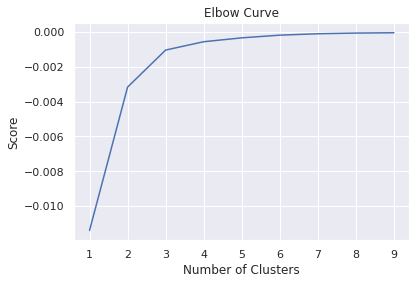

In [8]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = dfCluster[['Latitude']]
X_axis = dfCluster[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 6, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,locationId,Latitude,Longitude,cluster_label
0,1,37.360790,-5.988427,0
1,2,37.360790,-5.988427,0
2,3,37.360790,-5.988427,0
3,6,37.390850,-6.010817,1
4,7,37.390850,-6.010817,1
5,8,37.390850,-6.010817,1
6,14,37.401232,-5.962946,2
7,15,37.401232,-5.962946,2
8,16,37.401232,-5.962946,2
9,19,37.359260,-5.986087,0


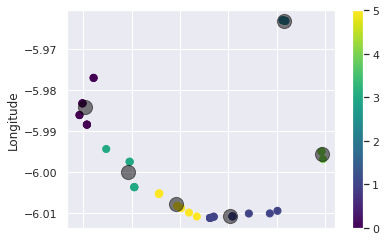

In [10]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [11]:
X = X[['locationId','cluster_label']]
X.head(5)

,locationId,cluster_label
0,1,0
1,2,0
2,3,0
3,6,1
4,7,1


In [13]:
clustered_data = dfCluster.merge(X, left_on='locationId', right_on='locationId')
clustered_data.head(5)

,locationId,Code,Soil,Density,Nspt,PhiNew,Phi,phiF,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
0,1,S1_TI-2C,Clay,1.818,20.0,23.00,23.00,32.8340,0.100000,26.50,127.475,0.49,0.49,-5.988427,37.36079,Av. Reina Mercedes,0
1,2,S1_TI-2C,Sand,2.006,31.0,30.31,30.31,35.9767,0.254000,50.15,198.799,0.20,0.20,-5.988427,37.36079,Av. Reina Mercedes,0
2,3,S1_TI-2C,Sand,2.050,NaN,23.50,23.50,NaN,NaN,NaN,NaN,0.47,0.47,-5.988427,37.36079,Av. Reina Mercedes,0
3,6,S1_TVII-2,Clay,2.156,10.0,23.64,23.64,29.9770,0.638699,5.00,62.635,0.18,0.18,-6.010817,37.39085,C/ Odiel,1
4,7,S1_TVII-2,Clay,2.063,NaN,23.14,23.14,NaN,NaN,NaN,NaN,0.52,0.52,-6.010817,37.39085,C/ Odiel,1


## Step two_Drawing

[Refrence ](https://medium.com/thelorry-product-tech-data/the-clustering-algorithm-with-geolocation-data-d6dd07ed36a)


In [15]:
clustered_data.head()

,locationId,Code,Soil,Density,Nspt,PhiNew,Phi,phiF,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
0,1,S1_TI-2C,Clay,1.818,20.0,23.00,23.00,32.8340,0.100000,26.50,127.475,0.49,0.49,-5.988427,37.36079,Av. Reina Mercedes,0
1,2,S1_TI-2C,Sand,2.006,31.0,30.31,30.31,35.9767,0.254000,50.15,198.799,0.20,0.20,-5.988427,37.36079,Av. Reina Mercedes,0
2,3,S1_TI-2C,Sand,2.050,NaN,23.50,23.50,NaN,NaN,NaN,NaN,0.47,0.47,-5.988427,37.36079,Av. Reina Mercedes,0
3,6,S1_TVII-2,Clay,2.156,10.0,23.64,23.64,29.9770,0.638699,5.00,62.635,0.18,0.18,-6.010817,37.39085,C/ Odiel,1
4,7,S1_TVII-2,Clay,2.063,NaN,23.14,23.14,NaN,NaN,NaN,NaN,0.52,0.52,-6.010817,37.39085,C/ Odiel,1


In [16]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', \
     'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', \
     'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', \
     'black', 'lightgray', 'red', 'blue', 'green', 'purple', \
     'orange', 'darkred', 'lightred', 'beige', 'darkblue', \
     'darkgreen', 'cadetblue', 'darkpurple','pink', 'lightblue', \
     'lightgreen', 'gray', 'black', 'lightgray' ]
  

In [17]:
from folium.map import Popup
location = clustered_data['Latitude'].mean(), clustered_data['Longitude'].mean()
mapCluster = folium.Map(location=location,zoom_start=15)

for _, row in clustered_data.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"],row["Longitude"]],
        radius=12, 
        weight=2, 
        fill=True, 
        popup = "Nspt: "+str(row['Nspt'])+"\nCu: "+ str(round(row['CuNew'],3))+"\nSoil: "+ str(row['Soil']),
        fill_color=colors[int(row["cluster_label"])],
        tooltip= str(row['Code']),
        color=colors[int(row["cluster_label"])]
    ).add_to(mapCluster)
mapCluster

In [ ]:
BasicPath = "/content/gdrive/MyDrive/Colab Notebooks/dataAnalySPT/mapAndReports/"
mapCluster.save(BasicPath+"mapFillNA_ClaySand.html")

# Split Area based on Cluster

In [27]:
clusterName = clustered_data.cluster_label.unique()
clusterName

array([0, 1, 2, 5, 3, 4], dtype=int32)

create a data frame dictionary to store your data frames

In [29]:
DataFrameDict = {elem : pd.DataFrame() for elem in clusterName}
DataFrameDict

{0: Empty DataFrame
 Columns: []
 Index: [], 1: Empty DataFrame
 Columns: []
 Index: [], 2: Empty DataFrame
 Columns: []
 Index: [], 3: Empty DataFrame
 Columns: []
 Index: [], 4: Empty DataFrame
 Columns: []
 Index: [], 5: Empty DataFrame
 Columns: []
 Index: []}

In [30]:
for key in DataFrameDict.keys():
    DataFrameDict[key] = clustered_data[:][clustered_data.cluster_label == key]

## Cluster 0

In [113]:
dfClsuter0 = DataFrameDict[0]
dfClsuter0

,locationId,Code,Soil,Density,Nspt,PhiNew,Phi,phiF,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
0,1,S1_TI-2C,Clay,1.818,20.0,23.0000,23.00,32.8340,0.100,26.50,127.475,0.490,0.49,-5.988427,37.360790,Av. Reina Mercedes,0
1,2,S1_TI-2C,Sand,2.006,31.0,30.3100,30.31,35.9767,0.254,50.15,198.799,0.200,0.20,-5.988427,37.360790,Av. Reina Mercedes,0
2,3,S1_TI-2C,Sand,2.050,NaN,23.5000,23.50,NaN,NaN,NaN,NaN,0.470,0.47,-5.988427,37.360790,Av. Reina Mercedes,0
9,19,S2_TI-1b,Clay,NaN,NaN,26.6400,26.64,NaN,NaN,NaN,NaN,0.050,0.05,-5.986087,37.359260,"Reina Mercedes, Luca de Tena",0
10,20,S2_TI-1b,Clay,NaN,32.0,36.2624,NaN,36.2624,0.268,52.30,205.283,0.268,NaN,-5.986087,37.359260,"Reina Mercedes, Luca de Tena",0
11,24,S4_TI-1b,Clay,NaN,NaN,15.6500,15.65,NaN,NaN,NaN,NaN,0.820,0.82,-5.977018,37.362171,Hosp. Virgen del Rocío,0
12,27,S4_TI-1b,Sand,NaN,33.0,36.5481,NaN,36.5481,0.282,54.45,211.767,0.282,NaN,-5.977018,37.362171,Hosp. Virgen del Rocío,0
13,31,S9_TI-1b,Clay,NaN,NaN,13.6000,13.60,NaN,NaN,NaN,NaN,0.530,0.53,-5.983228,37.359866,C/ Marques Luca de Tena,0
14,32,S9_TI-1b,Sand,NaN,NaN,27.2200,27.22,NaN,NaN,NaN,NaN,0.340,0.34,-5.983228,37.359866,C/ Marques Luca de Tena,0
15,33,S9_TI-1b,Sand,NaN,28.0,35.1196,NaN,35.1196,0.212,43.70,179.347,0.212,NaN,-5.983228,37.359866,C/ Marques Luca de Tena,0


### Data Describe 

In [70]:
dfClsuter0.iloc[:,[4,5,-6]].describe()

,Nspt,PhiNew,CuNew
count,5.000000,10.000000,10.000000
mean,28.800000,26.785010,0.366200
std,5.263079,8.097946,0.217988
min,20.000000,13.600000,0.050000
25%,28.000000,23.125000,0.226000
50%,31.000000,26.930000,0.311000
75%,32.000000,33.917200,0.485000
max,33.000000,36.548100,0.820000


### Box plot 

In [112]:
figC0 = go.Figure()
figC0.add_trace(go.Box(y=dfClsuter0["Nspt"], name='Nspt',
                marker_color = 'indianred'))
figC0.add_trace(go.Box(y=dfClsuter0["PhiNew"], name = 'Frinction Angle',
                marker_color = 'lightseagreen'))
figC0.add_trace(go.Box(y=dfClsuter0["CuNew"], name = 'Cohesion',
                marker_color = 'Blue'))

figC0.show()

## Cluster 1

In [114]:
dfClsuter1 = DataFrameDict[1]
dfClsuter1

,locationId,Code,Soil,Density,Nspt,PhiNew,Phi,phiF,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
3,6,S1_TVII-2,Clay,2.156,10.0,23.6400,23.64,29.9770,0.638699,5.00,62.635,0.180,0.18,-6.010817,37.390850,C/ Odiel,1
4,7,S1_TVII-2,Clay,2.063,NaN,23.1400,23.14,NaN,NaN,NaN,NaN,0.520,0.52,-6.010817,37.390850,C/ Odiel,1
5,8,S1_TVII-2,Sand,1.875,27.0,24.4200,24.42,34.8339,0.198000,41.55,172.863,0.260,0.26,-6.010817,37.390850,C/ Odiel,1
19,44,S4_TVI-1,Sand,NaN,16.0,31.6912,NaN,31.6912,0.044000,17.90,101.539,0.044,NaN,-6.010093,37.398565,C/ Americo Vespucio,1
20,47,S7_TVII-2,Clay,NaN,NaN,13.8700,13.87,NaN,NaN,NaN,NaN,0.410,0.41,-6.010905,37.386979,Ronda Triana,1
21,48,S7_TVII-2,Sand,NaN,18.0,32.2626,NaN,32.2626,0.072000,22.20,114.507,0.072,NaN,-6.010905,37.386979,Ronda Triana,1
29,73,S2_TVII-2,Clay,2.006,20.0,23.7800,23.78,32.8340,0.100000,26.50,127.475,0.330,0.33,-6.011196,37.386229,Ronda Triana,1
30,74,S2_TVII-2,Sand,1.895,24.0,27.6800,27.68,33.9768,0.156000,35.10,153.411,0.190,0.19,-6.011196,37.386229,Ronda Triana,1
31,75,S2_TVII-2,Sand,NaN,26.0,34.5482,NaN,34.5482,0.184000,39.40,166.379,0.184,NaN,-6.011196,37.386229,Ronda Triana,1
32,76,S2_TVII-2,Sand,NaN,80.0,49.9760,NaN,49.9760,0.940000,155.50,516.515,0.940,NaN,-6.011196,37.386229,Ronda Triana,1


### Data Describe 

In [110]:
dfClsuter1.iloc[:,[4,5,-6]].describe()

,Nspt,PhiNew,CuNew
count,9.000000,12.000000,12.000000
mean,26.333333,28.395667,0.335000
std,20.844664,9.009378,0.269322
min,10.000000,13.870000,0.044000
25%,16.000000,23.515000,0.180000
50%,20.000000,26.050000,0.225000
75%,26.000000,32.579450,0.437500
max,80.000000,49.976000,0.940000


### Box plot

In [116]:
figC1 = go.Figure()
figC1.add_trace(go.Box(y=dfClsuter1["Nspt"], name='Nspt',
                marker_color = 'indianred'))
figC1.add_trace(go.Box(y=dfClsuter1["PhiNew"], name = 'Frinction Angle',
                marker_color = 'lightseagreen'))
figC1.add_trace(go.Box(y=dfClsuter1["CuNew"], name = 'Cohesion',
                marker_color = 'Blue'))

figC1.show()

## Cluster 2

In [117]:
dfClsuter2 = DataFrameDict[2]
dfClsuter2

,locationId,Code,Soil,Density,Nspt,PhiNew,Phi,phiF,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
6,14,S5_TIII-1B,Clay,1.965,32.0,25.4600,25.46,36.2624,0.268,52.30,205.283,0.360,0.36,-5.962946,37.401232,Av. Kansas City,2
7,15,S5_TIII-1B,Sand,NaN,41.0,38.8337,NaN,38.8337,0.394,71.65,263.639,0.394,NaN,-5.962946,37.401232,Av. Kansas City,2
8,16,S5_TIII-1B,Sand,NaN,48.0,40.8336,NaN,40.8336,0.492,86.70,309.027,0.492,NaN,-5.962946,37.401232,Av. Kansas City,2
16,36,S6_TIII-1b,Clay,1.960,NaN,31.1000,31.10,NaN,NaN,NaN,NaN,0.210,0.21,-5.963096,37.401742,Renfe/Kansas City/Tesalonica,2
17,37,S6_TIII-1b,Sand,1.920,NaN,16.9900,16.99,NaN,NaN,NaN,NaN,1.120,1.12,-5.963096,37.401742,Renfe/Kansas City/Tesalonica,2
18,38,S6_TIII-1b,Sand,NaN,20.0,31.9300,31.93,32.8340,0.100,26.50,127.475,0.520,0.52,-5.963096,37.401742,Renfe/Kansas City/Tesalonica,2


### Data Describe 

In [75]:
dfClsuter2.iloc[:,[4,5,-6]].describe()

,Nspt,PhiNew,CuNew
count,4.000000,6.000000,6.000000
mean,35.250000,30.857883,0.516000
std,12.093387,8.783985,0.315678
min,20.000000,16.990000,0.210000
25%,29.000000,26.870000,0.368500
50%,36.500000,31.515000,0.443000
75%,42.750000,37.107775,0.513000
max,48.000000,40.833600,1.120000


### Box plot

In [119]:
figC2 = go.Figure()
figC2.add_trace(go.Box(y=dfClsuter2["Nspt"], name='Nspt',
                marker_color = 'indianred'))
figC2.add_trace(go.Box(y=dfClsuter2["PhiNew"], name = 'Frinction Angle',
                marker_color = 'lightseagreen'))
figC2.add_trace(go.Box(y=dfClsuter2["CuNew"], name = 'Cohesion',
                marker_color = 'Blue'))

figC2.show()

## Cluster 3

In [120]:
dfClsuter3 = DataFrameDict[3]
dfClsuter3

,locationId,Code,Soil,Density,Nspt,PhiNew,Phi,phiF,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
24,60,SP17,Clay,1.890,NaN,27.8000,27.80,NaN,NaN,NaN,NaN,0.100000,0.10,-6.003685,37.370576,Calle Alfonso Borbon,3
25,61,SP17,Clay,NaN,14.0,20.0300,20.03,31.1198,0.016,13.60,88.571,0.130000,0.13,-6.003685,37.370576,Calle Alfonso Borbon,3
26,62,SP17,Sand,NaN,20.0,32.8340,NaN,32.8340,0.100,26.50,127.475,0.100000,NaN,-6.003685,37.370576,Calle Alfonso Borbon,3
27,67,S1_TVIII-1,Sand,NaN,14.0,31.1198,NaN,31.1198,0.016,13.60,88.571,0.138681,NaN,-5.997485,37.369618,C/ Antonio Bienvenida (Feria),3
28,68,S1_TVIII-1,Sand,1.993,27.0,17.8900,17.89,34.8339,0.198,41.55,172.863,0.520000,0.52,-5.997485,37.369618,C/ Antonio Bienvenida (Feria),3
33,80,S3_TVIII-1,Clay,1.955,NaN,22.8900,22.89,NaN,NaN,NaN,NaN,0.600000,0.60,-5.994372,37.364774,Puerto de Sevilla,3


### Data Describe 

In [81]:
dfClsuter3.iloc[:,[4,5,-6]].describe()

,Nspt,PhiNew,CuNew
count,4.000000,6.000000,6.000000
mean,18.750000,25.427300,0.264780
std,6.184658,6.087251,0.230600
min,14.000000,17.890000,0.100000
25%,14.000000,20.745000,0.107500
50%,17.000000,25.345000,0.134341
75%,21.750000,30.289850,0.424670
max,27.000000,32.834000,0.600000


### Box plot

In [121]:
figC3 = go.Figure()
figC3.add_trace(go.Box(y=dfClsuter3["Nspt"], name='Nspt',
                marker_color = 'indianred'))
figC3.add_trace(go.Box(y=dfClsuter3["PhiNew"], name = 'Frinction Angle',
                marker_color = 'lightseagreen'))
figC3.add_trace(go.Box(y=dfClsuter3["CuNew"], name = 'Cohesion',
                marker_color = 'Blue'))

figC3.show()

## Cluster 4

In [122]:
dfClsuter4 = DataFrameDict[4]
dfClsuter4

,locationId,Code,Soil,Density,Nspt,PhiNew,Phi,phiF,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
38,101,S2_TV-2,Sand,2.06,NaN,10.8100,10.81,NaN,NaN,NaN,NaN,0.590000,0.59,-5.994999,37.409252,Av. Alvaro Alonso,4
39,102,S2_TV-2,Sand,NaN,10.0,29.9770,NaN,29.9770,0.638699,5.00,62.635,0.638699,NaN,-5.994999,37.409252,Av. Alvaro Alonso,4
40,108,S3_TV-2,Sand,1.90,11.0,30.2627,NaN,30.2627,0.704818,7.15,69.119,0.704818,NaN,-5.996847,37.409546,C/ J. Bautista Muñoz,4


### Data Describe 

In [78]:
dfClsuter4.iloc[:,[4,5,-6]].describe()

,Nspt,PhiNew,CuNew
count,2.000000,3.000000,3.000000
mean,10.500000,23.683233,0.644506
std,0.707107,11.149462,0.057629
min,10.000000,10.810000,0.590000
25%,10.250000,20.393500,0.614350
50%,10.500000,29.977000,0.638699
75%,10.750000,30.119850,0.671758
max,11.000000,30.262700,0.704818


### Box plot

In [123]:
figC4 = go.Figure()
figC4.add_trace(go.Box(y=dfClsuter4["Nspt"], name='Nspt',
                marker_color = 'indianred'))
figC4.add_trace(go.Box(y=dfClsuter4["PhiNew"], name = 'Frinction Angle',
                marker_color = 'lightseagreen'))
figC4.add_trace(go.Box(y=dfClsuter4["CuNew"], name = 'Cohesion',
                marker_color = 'Blue'))

figC4.show()

## Cluster 5

In [124]:
dfClsuter5 = DataFrameDict[5]
dfClsuter5

,locationId,Code,Soil,Density,Nspt,PhiNew,Phi,phiF,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
22,53,SP16,Clay,1.960,16.0,20.3900,20.39,31.6912,0.044000,17.90,101.539,0.420000,0.42,-6.005210,37.375729,Calle Niebla,5
23,54,SP16,Sand,NaN,25.0,34.2625,NaN,34.2625,0.170000,37.25,159.895,0.170000,NaN,-6.005210,37.375729,Calle Niebla,5
34,87,S4_TVII-2,Sand,2.043,30.0,31.9700,31.97,35.6910,0.240000,48.00,192.315,0.190000,0.19,-6.008259,37.379477,Lopez de Gomara,5
35,88,S4_TVII-2,Sand,NaN,33.0,36.5481,NaN,36.5481,0.282000,54.45,211.767,0.282000,NaN,-6.008259,37.379477,Lopez de Gomara,5
36,89,S4_TVII-2,Sand,NaN,29.0,35.4053,NaN,35.4053,0.226000,45.85,185.831,0.226000,NaN,-6.008259,37.379477,Lopez de Gomara,5
37,93,S8_TVII-2,Sand,1.980,NaN,32.0200,32.02,NaN,NaN,NaN,NaN,0.100000,0.10,-6.009896,37.381862,Ronda Triana,5
41,111,S3_TVII-2,Sand,2.020,14.0,32.5900,32.59,31.1198,0.016000,13.60,88.571,0.160000,0.16,-6.010848,37.383491,Crucero Baleares,5
42,116,S9_TVII-2,Sand,NaN,4.0,28.2628,NaN,28.2628,0.241989,-7.90,23.731,0.241989,NaN,-6.005359,37.375627,C/ Santa Fe,5
43,119,S10_TVII-2,Clay,1.900,NaN,3.5000,3.50,NaN,NaN,NaN,NaN,0.630000,0.63,-6.008791,37.380210,Lopez de Gomara,5
44,120,S10_TVII-2,Sand,NaN,16.0,31.6912,NaN,31.6912,0.044000,17.90,101.539,0.044000,NaN,-6.008791,37.380210,Lopez de Gomara,5


### Data Describe 

In [125]:
dfClsuter5.iloc[:,[4,5,-6]].describe()

,Nspt,PhiNew,CuNew
count,8.000000,10.000000,10.000000
mean,20.875000,28.663990,0.246399
std,9.948977,9.930671,0.169270
min,4.000000,3.500000,0.044000
25%,15.500000,29.119900,0.162500
50%,20.500000,31.995000,0.208000
75%,29.250000,33.844375,0.271997
max,33.000000,36.548100,0.630000


### Box plot

In [126]:
figC5 = go.Figure()
figC5.add_trace(go.Box(y=dfClsuter5["Nspt"], name='Nspt',
                marker_color = 'indianred'))
figC5.add_trace(go.Box(y=dfClsuter5["PhiNew"], name = 'Frinction Angle',
                marker_color = 'lightseagreen'))
figC5.add_trace(go.Box(y=dfClsuter5["CuNew"], name = 'Cohesion',
                marker_color = 'Blue'))

figC5.show()

## Compare Cluster location to one another

### Cohesion Vs Cluster

In [90]:
N = 6     # Number of boxes
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

In [127]:
figCC = go.Figure()
figCC.add_trace(go.Box(y=dfClsuter0["CuNew"], name='Cohesion_Cluster0',
                marker_color = c[0], boxpoints='all'))
figCC.add_trace(go.Box(y=dfClsuter1["CuNew"], name='Cohesion_Cluster1',
                marker_color = c[1], boxpoints='all'))
figCC.add_trace(go.Box(y=dfClsuter2["CuNew"], name='Cohesion_Cluster2',
                marker_color = c[2], boxpoints='all'))
figCC.add_trace(go.Box(y=dfClsuter3["CuNew"], name='Cohesion_Cluster3',
                marker_color = c[3], boxpoints='all'))
figCC.add_trace(go.Box(y=dfClsuter4["CuNew"], name='Cohesion_Cluster4',
                marker_color = c[4], boxpoints='all'))
figCC.add_trace(go.Box(y=dfClsuter5["CuNew"], name='Cohesion_Cluster5',
                marker_color = c[5], boxpoints='all'))

figCC.show()

#### Cohesion of Sand_Alone

In [128]:
dfClsuter0_S = dfClsuter0[dfClsuter0["Soil"]=="Sand"]
dfClsuter1_S = dfClsuter1[dfClsuter1["Soil"]=="Sand"]
dfClsuter2_S = dfClsuter2[dfClsuter2["Soil"]=="Sand"]
dfClsuter3_S = dfClsuter3[dfClsuter3["Soil"]=="Sand"]
dfClsuter4_S = dfClsuter4[dfClsuter4["Soil"]=="Sand"]
dfClsuter5_S = dfClsuter5[dfClsuter5["Soil"]=="Sand"]

figCC_S = go.Figure()
figCC_S.add_trace(go.Box(y=dfClsuter0_S["CuNew"], name='Cohesion_Cluster0',
                marker_color = c[0], boxpoints='all'))
figCC_S.add_trace(go.Box(y=dfClsuter1_S["CuNew"], name='Cohesion_Cluster1',
                marker_color = c[1], boxpoints='all'))
figCC_S.add_trace(go.Box(y=dfClsuter2_S["CuNew"], name='Cohesion_Cluster2',
                marker_color = c[2], boxpoints='all'))
figCC_S.add_trace(go.Box(y=dfClsuter3_S["CuNew"], name='Cohesion_Cluster3',
                marker_color = c[3], boxpoints='all'))
figCC_S.add_trace(go.Box(y=dfClsuter4_S["CuNew"], name='Cohesion_Cluster4',
                marker_color = c[4], boxpoints='all'))
figCC_S.add_trace(go.Box(y=dfClsuter5_S["CuNew"], name='Cohesion_Cluster5',
                marker_color = c[5], boxpoints='all'))

figCC_S.show()


### Nspt Vs Cluster

In [ ]:
N = 6     # Number of boxes
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

In [129]:
figCN = go.Figure()
figCN.add_trace(go.Box(y=dfClsuter0["Nspt"], name='Nspt_Cluster0',
                marker_color = c[0], boxpoints='all'))
figCN.add_trace(go.Box(y=dfClsuter1["Nspt"], name='Nspt_Cluster1',
                marker_color = c[1], boxpoints='all'))
figCN.add_trace(go.Box(y=dfClsuter2["Nspt"], name='Nspt_Cluster2',
                marker_color = c[2], boxpoints='all'))
figCN.add_trace(go.Box(y=dfClsuter3["Nspt"], name='Nspt_Cluster3',
                marker_color = c[3], boxpoints='all'))
figCN.add_trace(go.Box(y=dfClsuter4["Nspt"], name='Nspt_Cluster4',
                marker_color = c[4], boxpoints='all'))
figCN.add_trace(go.Box(y=dfClsuter5["Nspt"], name='Nspt_Cluster5',
                marker_color = c[5], boxpoints='all'))

figCN.show()

#### Nspt of Sand Alone

In [130]:
figCN_S = go.Figure()
figCN_S.add_trace(go.Box(y=dfClsuter0_S["Nspt"], name='Nspt_Cluster0',
                marker_color = c[0], boxpoints='all'))
figCN_S.add_trace(go.Box(y=dfClsuter1_S["Nspt"], name='Nspt_Cluster1',
                marker_color = c[1], boxpoints='all'))
figCN_S.add_trace(go.Box(y=dfClsuter2_S["Nspt"], name='Nspt_Cluster2',
                marker_color = c[2], boxpoints='all'))
figCN_S.add_trace(go.Box(y=dfClsuter3_S["Nspt"], name='Nspt_Cluster3',
                marker_color = c[3], boxpoints='all'))
figCN_S.add_trace(go.Box(y=dfClsuter4_S["Nspt"], name='Nspt_Cluster4',
                marker_color = c[4], boxpoints='all'))
figCN_S.add_trace(go.Box(y=dfClsuter5_S["Nspt"], name='Nspt_Cluster5',
                marker_color = c[5], boxpoints='all'))

figCN_S.show()

### Friction Angle Vs Cluster

In [131]:
figCf = go.Figure()
figCf.add_trace(go.Box(y=dfClsuter0["PhiNew"], name='Friction Angle_Cluster0',
                marker_color = c[0], boxpoints='all'))
figCf.add_trace(go.Box(y=dfClsuter1["PhiNew"], name='Friction Angle_Cluster1',
                marker_color = c[1], boxpoints='all'))
figCf.add_trace(go.Box(y=dfClsuter2["PhiNew"], name='Friction Angle_Cluster2',
                marker_color = c[2], boxpoints='all'))
figCf.add_trace(go.Box(y=dfClsuter3["PhiNew"], name='Friction Angle_Cluster3',
                marker_color = c[3], boxpoints='all'))
figCf.add_trace(go.Box(y=dfClsuter4["PhiNew"], name='Friction Angle_Cluster4',
                marker_color = c[4], boxpoints='all'))
figCf.add_trace(go.Box(y=dfClsuter5["PhiNew"], name='Friction Angle_Cluster5',
                marker_color = c[5], boxpoints='all'))

figCf.show()

#### Friction of Sand Alone

In [132]:
figCf_S = go.Figure()
figCf_S.add_trace(go.Box(y=dfClsuter0_S["PhiNew"], name='Friction Angle_Cluster0',
                marker_color = c[0], boxpoints='all'))
figCf_S.add_trace(go.Box(y=dfClsuter1_S["PhiNew"], name='Friction Angle_Cluster1',
                marker_color = c[1], boxpoints='all'))
figCf_S.add_trace(go.Box(y=dfClsuter2_S["PhiNew"], name='Friction Angle_Cluster2',
                marker_color = c[2], boxpoints='all'))
figCf_S.add_trace(go.Box(y=dfClsuter3_S["PhiNew"], name='Friction Angle_Cluster3',
                marker_color = c[3], boxpoints='all'))
figCf_S.add_trace(go.Box(y=dfClsuter4_S["PhiNew"], name='Friction Angle_Cluster4',
                marker_color = c[4], boxpoints='all'))
figCf_S.add_trace(go.Box(y=dfClsuter5_S["PhiNew"], name='Friction Angle_Cluster5',
                marker_color = c[5], boxpoints='all'))

figCf_S.show()